In [1]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install tweepy 

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import tweepy #used to work with Twitter's API
import webbrowser
import time
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import json

In [4]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN" #pulled from developer account for Twitter
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ" #pulled from developer account for Twitter
#key and secret is generated by Twitter developer account

In [5]:
callback_uri = 'oob'#url 

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri) #authorization to pull data from Twitter's API
redirect_url = auth.get_authorization_url() 
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=xMVmcAAAAAABQdBPAAABeozP5fk


In [7]:
webbrowser.open(redirect_url)

True

In [8]:
user_pint_input = input("What's the pin value? ") #this is based upon Twitter Developer account
#Pin is generated new everytime this cell is run

What's the pin value? 2151243


In [9]:
auth.get_access_token(user_pint_input)

('781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2',
 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41')

In [10]:
print(auth.access_token, auth.access_token_secret)

781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2 fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41


In [11]:
api = tweepy.API(auth)

In [12]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append("user")
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [13]:
# pulls data from Visual Studio Code's twitter page https://twitter.com/code
screen_name = input("Enter twitter's username to pull data from: ") #"code"
#user = api.get_user(screen_name)
#user_timeline = user.timeline(screen_name)  # recent tweets are pulled in the spreadsheet
#print(user_timeline) 
# fetching the statuses
user_timeline = api.user_timeline(screen_name, count=201)#tweet count limit is 200
df1 = extract_timeline_as_df(user_timeline)
print(df1)


Enter twitter's username to pull data from: slykimba
                                                  text  in_reply_to_status_id  \
0    I’m going to be boarding a plane for the first...                    NaN   
1    One of my favorite songs off the album. This i...                    NaN   
2    RT @vincestaples: I can die tonight so today, ...                    NaN   
3              @iwish_youwould https://t.co/CzfQ2Xicb6                    NaN   
4    @Asapoddfuture05 Like that joint and Vince Sta...           1.413521e+18   
..                                                 ...                    ...   
195  My head is in an awkward space rn and all I ca...                    NaN   
196  RT @JoyAnjelica: Best believe if my parents di...                    NaN   
197  @CartierWave_ My man!!! I didn’t know you were...           1.410993e+18   
198  This is your monthly reminder to skip that Sav...                    NaN   
199  RT @hailtitss: YOU KNOW WHAT TIME IT IS.. ITS ...  

In [14]:
screen_name = input("Enter twitter's username to pull data from: ") #pulls data from Visual Studio Code's twitter page https://twitter.com/code
user = api.get_user(screen_name)
user_timeline = user.timeline() 
df1 = extract_timeline_as_df(user_timeline) #recent tweets are pulled in the spreadsheet
df1.head(201)

Enter twitter's username to pull data from: slykimba


,text,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,lang,in_reply_to_user_id,favorite_count,id_str,retweet_count,quoted_status_id,source,id,in_reply_to_user_id_str,source_url,quoted_status_id_str,user,author
0,I’m going to be boarding a plane for the first...,NaN,NaN,NaN,en,NaN,4,1413569940121165826,0,NaN,Twitter for iPhone,1413569940121165826,NaN,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
1,One of my favorite songs off the album. This i...,NaN,NaN,NaN,en,NaN,1,1413542995979292672,0,1.413501e+18,Twitter for iPhone,1413542995979292672,NaN,http://twitter.com/download/iphone,1413501363473031169,SlyKimba,SlyKimba
2,"RT @vincestaples: I can die tonight so today, ...",NaN,NaN,NaN,en,NaN,0,1413531547685228544,693,NaN,Twitter for iPhone,1413531547685228544,NaN,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
3,@iwish_youwould https://t.co/CzfQ2Xicb6,NaN,NaN,iwish_youwould,und,2.116984e+08,1,1413527559984271364,1,1.412894e+18,Twitter for iPhone,1413527559984271364,211698370,http://twitter.com/download/iphone,1412893638586212352,SlyKimba,SlyKimba
4,@Asapoddfuture05 Like that joint and Vince Sta...,1.413521e+18,1413520606704852999,Asapoddfuture05,en,1.062839e+18,0,1413520793540104199,0,NaN,Twitter for iPhone,1413520793540104199,1062838567683137536,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
5,IDK’s album is like that.,NaN,NaN,NaN,en,NaN,2,1413519142322376708,2,NaN,Twitter for iPhone,1413519142322376708,NaN,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
6,@KingShawn_Larry MY BOY IS FINALLY BACK!!! \n\...,1.413507e+18,1413506571074560008,KingShawn_Larry,en,2.941097e+09,0,1413508384972632064,0,NaN,Twitter for iPhone,1413508384972632064,2941097283,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
7,Wish I could have started off today like I did...,NaN,NaN,NaN,en,NaN,0,1413504813610921992,0,NaN,Twitter for iPhone,1413504813610921992,NaN,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
8,@Dexsavy My best ones from last night lol. htt...,1.413500e+18,1413500244365430796,Dexsavy,en,4.389348e+09,1,1413504263372767233,0,NaN,Twitter for iPhone,1413504263372767233,4389347597,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
9,🔥🔥🔥 https://t.co/QEkc35sUPz,NaN,NaN,NaN,und,NaN,0,1413461326693814274,0,1.413349e+18,Twitter for iPhone,1413461326693814274,NaN,http://twitter.com/download/iphone,1413348571500318724,SlyKimba,SlyKimba


In [15]:
df1.describe()

,in_reply_to_status_id,in_reply_to_user_id,favorite_count,retweet_count,quoted_status_id,id
count,4.000000e+00,5.000000e+00,20.000000,20.000000,4.000000e+00,2.000000e+01
mean,1.413461e+18,2.125677e+17,0.450000,6431.150000,1.413087e+18,1.413434e+18
std,9.646874e+13,4.753159e+17,0.998683,16355.850762,4.126584e+14,9.713864e+13
min,1.413317e+18,2.116984e+08,0.000000,0.000000,1.412604e+18,1.413312e+18
25%,1.413454e+18,3.874883e+08,0.000000,0.000000,1.412821e+18,1.413325e+18
50%,1.413503e+18,2.941097e+09,0.000000,3.000000,1.413121e+18,1.413461e+18
75%,1.413510e+18,4.389348e+09,0.250000,4447.500000,1.413387e+18,1.413520e+18
max,1.413521e+18,1.062839e+18,4.000000,71385.000000,1.413501e+18,1.413570e+18


In [16]:
df1.shape

(20, 17)

In [17]:
df1.to_csv('tweetspreadsheet.csv', index=False)

In [18]:
df1_saved_file = pd.read_csv('tweetspreadsheet.csv')
df1_saved_file

,text,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,lang,in_reply_to_user_id,favorite_count,id_str,retweet_count,quoted_status_id,source,id,in_reply_to_user_id_str,source_url,quoted_status_id_str,user,author
0,I’m going to be boarding a plane for the first...,NaN,NaN,NaN,en,NaN,4,1413569940121165826,0,NaN,Twitter for iPhone,1413569940121165826,NaN,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
1,One of my favorite songs off the album. This i...,NaN,NaN,NaN,en,NaN,1,1413542995979292672,0,1.413501e+18,Twitter for iPhone,1413542995979292672,NaN,http://twitter.com/download/iphone,1.413501e+18,SlyKimba,SlyKimba
2,"RT @vincestaples: I can die tonight so today, ...",NaN,NaN,NaN,en,NaN,0,1413531547685228544,693,NaN,Twitter for iPhone,1413531547685228544,NaN,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
3,@iwish_youwould https://t.co/CzfQ2Xicb6,NaN,NaN,iwish_youwould,und,2.116984e+08,1,1413527559984271364,1,1.412894e+18,Twitter for iPhone,1413527559984271364,2.116984e+08,http://twitter.com/download/iphone,1.412894e+18,SlyKimba,SlyKimba
4,@Asapoddfuture05 Like that joint and Vince Sta...,1.413521e+18,1.413521e+18,Asapoddfuture05,en,1.062839e+18,0,1413520793540104199,0,NaN,Twitter for iPhone,1413520793540104199,1.062839e+18,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
5,IDK’s album is like that.,NaN,NaN,NaN,en,NaN,2,1413519142322376708,2,NaN,Twitter for iPhone,1413519142322376708,NaN,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
6,@KingShawn_Larry MY BOY IS FINALLY BACK!!! \n\...,1.413507e+18,1.413507e+18,KingShawn_Larry,en,2.941097e+09,0,1413508384972632064,0,NaN,Twitter for iPhone,1413508384972632064,2.941097e+09,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
7,Wish I could have started off today like I did...,NaN,NaN,NaN,en,NaN,0,1413504813610921992,0,NaN,Twitter for iPhone,1413504813610921992,NaN,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
8,@Dexsavy My best ones from last night lol. htt...,1.413500e+18,1.413500e+18,Dexsavy,en,4.389348e+09,1,1413504263372767233,0,NaN,Twitter for iPhone,1413504263372767233,4.389348e+09,http://twitter.com/download/iphone,NaN,SlyKimba,SlyKimba
9,🔥🔥🔥 https://t.co/QEkc35sUPz,NaN,NaN,NaN,und,NaN,0,1413461326693814274,0,1.413349e+18,Twitter for iPhone,1413461326693814274,NaN,http://twitter.com/download/iphone,1.413349e+18,SlyKimba,SlyKimba


In [19]:
# screen name of the account to be fetched
screen_name = input("Enter twitter's username to see recent tweet interactions: ")
#will display last fetched tweet as the Twitter account's "Pinned Tweet" if they have a pinned tweet
  
# number of statuses to be fetched
count = 5
  
# fetching the statuses
statuses = api.user_timeline(screen_name, count = count)
  
# printing the statuses
for status in statuses:
    print(status.text, end = "\n\n") 

Enter twitter's username to see recent tweet interactions: code
@MartijnSaly @github We have some docs to get you started! This is about using Jupyter with Python (but there are k… https://t.co/plJo71ldj2

Gist + notepad + VS Code = GistPad 📘
View and edit your @GitHub Gist directly in VS Code, as if they were local fil… https://t.co/sHVzxSyFyb

RT @TylerLeonhardt: Look at that badge to open in @code ✨

Pretty easy markdown to add to README in a GitHub repo:

[![Open in Visual Studi…

@KlostermannSan @github Traditionally, we've named releases according to the month work was done in. Our team did m… https://t.co/pNeyRFMsU9

🎉 The June VS Code release is here! Check out what’s new:

🖥 Open a terminal in the editor area
🧮 Add math formulas… https://t.co/49QTi1HxCu



In [20]:
#search_words = ["#covid19", "2020", "lockdown"]
key_word = input("Enter key word to  pull from Twitter: ")#'@code' #searches all tweets that reference the key_word specified 
date_since = "2021-06-21"

tweets = tweepy.Cursor(api.search, key_word, geocode="38.892062,-77.019912,3000km", lang="en", since=date_since).items(10)
## the geocode is for Washington, DC; format for geocode="lattitude,longitude,radius"
## radius should be in miles or km
#items references the number of tweets to pull 


for tweet in tweets:
    print("created_at: {}\nuser: {}\ntweet text: {}\ngeo_location: {}".
            format(tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location))
    print("\n")
## tweet.user.location will give you the general location of the user and not the particular location for the tweet itself, as it turns out, most of the users do not share the exact location of the tweet

Enter key word to  pull from Twitter: python
created_at: 2021-07-09 19:48:10
user: Academichelp131
tweet text: Get reliable &amp; affordable services, 

summer classes 
Calculus
English 
Business paper
Physiology
Thesis
Math 
Case… https://t.co/wBnMADh7VC
geo_location: Los Angeles


created_at: 2021-07-09 19:48:00
user: JSTweetsBot
tweet text: RT @Udemy_Coupons1: Adobe Premiere Pro CC Video Editing Course
https://t.co/n6bfb5qBSp

#MachineLearning. #BigData #Analytics #DataScience…
geo_location: 


created_at: 2021-07-09 19:47:56
user: cybersec_feeds
tweet text: RT @MAYASSIGNMENT1: We guarantee the best results
Pay on delivery
Bio 
English
Chemistry
Mathlab
Genetics
Ecology
Psychology
Essays
Final e…
geo_location: Internet


created_at: 2021-07-09 19:47:44
user: hubofml
tweet text: RT @Udemy_Coupons1: Adobe Premiere Pro CC Video Editing Course
https://t.co/n6bfb5qBSp

#MachineLearning. #BigData #Analytics #DataScience…
geo_location: Germany 


created_at: 2021-07-09 19:47:37
user: progr

In [21]:
#searches all relevant tweet as specified from date range 
print("Date format is as follows: Year-Month-Day= 0000-00-00")
print("Date range must be within a 7 day range")
date_since = input("Enter beginging date: ")#'2021-06-14'
date_until = input("Enter last date: ")#'2021-06-21'
tweets = tweepy.Cursor(api.search, geocode="38.892062,-77.019912,3000km", lang="en", q= input("Enter key word to search through Twitter's API of relevant Tweets: "), since=date_since,until=date_until).items(10) #'olympic'
for tweet in tweets:         
    print (tweet.text)  

Date format is as follows: Year-Month-Day= 0000-00-00
Date range must be within a 7 day range
Enter beginging date: 2021-07-02
Enter last date: 2021-07-09
Enter key word to search through Twitter's API of relevant Tweets: olympic
RT @FirstTake: Patrick Mahomes speaks on Sha'Carri Richardson being left off the Olympic relay team.

"She put in the work. Even though she…
RT @MorganRSperry: Losing it at the US Olympic Rowing Team being obsessed with @ewarren https://t.co/fPVnSP96Jn
RT @Scattered211: If there's a state of emergency in Tokyo why are they still holding the Olympic Games?
Rules governing Olympic runners send a disturbing message to female athletes, especially those who are Black https://t.co/5Q0MtW4h7J
@peacockTV never did update their coverage of the Olympic T&amp;F trials to include the final two days. So what T&amp;F eve… https://t.co/wGlTtJoAeh
RT @USARugby: Heartbroken and sending our support to @benpinkelman2. 

@Brett024 jumps into his place. 

Cody Melphy is named as a

In [22]:
for status in tweepy.Cursor(api.user_timeline, screen_name= input("Enter Twitter Username: "), tweet_mode="extended").items(): #'@code'
    print(status.full_text)

Enter Twitter Username: code
@MartijnSaly @github We have some docs to get you started! This is about using Jupyter with Python (but there are kernels for many more programming languages, including C#/F# and JS/TS): https://t.co/CmLUYIqjP3
Gist + notepad + VS Code = GistPad 📘
View and edit your @GitHub Gist directly in VS Code, as if they were local files, by @LostInTangent ✏️
Get the extension 👉 https://t.co/Y26Wi6kgVq https://t.co/JaUhdnrsYt
RT @TylerLeonhardt: Look at that badge to open in @code ✨

Pretty easy markdown to add to README in a GitHub repo:

[![Open in Visual Studi…
@KlostermannSan @github Traditionally, we've named releases according to the month work was done in. Our team did most of the work for this release in June, so this is the June release!
🎉 The June VS Code release is here! Check out what’s new:

🖥 Open a terminal in the editor area
🧮 Add math formulas to Markdown
🔖 “Open in VS Code” badge for @GitHub repos
…and more!

Release notes: https://t.co/ik1X7EvE2o
Do

RT @davidpine7: 💯 The @code extension API was built so nicely, extending their functionality is a thing of beauty. With @typescript I'm rig…
@olafurw Is your code in C:\FOO ? If so, pressing the blue button trusts that folder only. The checkbox trusts the parent folder. Agree in your case, with the code in C:\, it may not make sense.
@olafurw We are working to make development environments safer and reduce the possibility of supply-chain attacks, even in code that is cloned locally. You can read more in the link below, but please do share your feedback with us on how it could be improved. https://t.co/O9FnntW1gx
RT @miguelsolorio_: 🚀 Now that we shipped terminal tabs in @code, I wanted to share a little bit of the backstory of how it all came about.…
Missed the live event? 🎉 You can now watch the recording on our YouTube channel.
Link 👉 https://t.co/cDBBuSuuh9 https://t.co/sJjzNWkikA
@theGoldyMan @mattbierner We are on Electron 12 currently in the Stable branch
🎉 The May @code release 

@ibraheemYG We support 32-bit on Windows. On Linux, we had to drop 32-bit support because we're using Electron, and Electron itself stopped supporting Linux/32-bit Intel (we still supporting 32-bit ARM): https://t.co/mcCKNto9Tj
What is RemoteHub even? 🤔 And what about other new things like terminal tabs? 🔖 Java debugging? ☕️
We saw a lot of new (and cool) stuff in the release party earlier today 🎉
ICYMI, watch the recording ▶️ https://t.co/7fTVy8LzgX https://t.co/EhXFdItzYd
The Student Zone at #MSBuild welcomes all students, career changers, life-long learners, and even professionals!
You'll find awesome sessions about tech like VS Code, GitHub, AI… and languages like Python, Javascript, C#, and more.
Start learning 👉 https://t.co/lvdEC7YKJV https://t.co/VgRd4VL5M4
The latest version of the #Python extension for VS Code now includes the new Pylance language server by default for a much better Python editing experience 🐍
Read more 🔗 https://t.co/xdLwpMHZGN https://t.co/8NtJHCoJbg
Starti

RT @JustinWGrote: One of the best, most incredible, and most underrated features of @code is the ability to move panes *wherever* you want.…
RT @iamdillion: How to create Custom Tasks in VSCode

https://t.co/rxiEsX5m82 https://t.co/sJgsHZaGOZ
RT @yaojinyang: Blogging time again. Welcome to the update of #Java on VS @code. In the last couple of months, together with @RedHat, we ha…
RT @5t3ph: 🛠 VSCode Quick Tip

You can pin tabs from their context (aka right-click) menu.

Adjust `workbench.editor.pinnedTabSizing` to re…
RT @miguelsolorio_: ⚡️ One of my favorite @code + @github features is mentioning an issue in the SCM view. You can also modify the string t…
@jongallant That'd be the fantastic work of @Tyriar and @MeganRogge_!
RT @pythonvscode: The April release of the #Python extension in VS @code is here! 

Check out what's new:

⭐ Preview 🔍 support for #Poetry…
RT @msdevCA: Microsoft Senior Software Engineer @mattbierner is sharing some awesome VS Code Tips &amp; Tricks on the Dev.le

RT @ClaudiaRegio: Are you collaborating in #Jupyter notebooks📒? Want to help VS @code improve that experience? Take &lt;5 min to let @pythonvs…
@tattva5 @JGamblin Apologies about this! There's active investigation underway regarding this.
@JGamblin Thanks for letting us know! It looks like https://t.co/gl2xGCOb8m is back online for us now - can you see it as well?
RT @pythonvscode: We have a new release of the #Jupyter extension 🐍📒 for VS Code and it's 🔥!

Check out the new updates and enhancements he…
@satyalumesh Not that I know of. But last week we had a livestream with folks from @Tabnine_ and @ShinanYotam had some thoughts on that 🙊 https://t.co/Cg2Yb71vZ4
RT @jongallant: If GitHub Codespaces in the browser ain't your thing, you can open it right from within VS Code.

The GitHub Codespaces VS…
@codexpath2 @thecodercoder We have info here to help you install and work with custom themes! https://t.co/zn9BN9N46G

You can can search up new themes in the Extensions view :)
Copying and 

RT @codepo8: The live preview of @emmetio in @code is 🔥 https://t.co/afOrT0eY4E
RT @talk2MeGooseman: Made a simple (but lengthy) walkthrough of how awesome I think @github Codespaces is and how it pairs nicely with your…
RT @mattbierner: Today's @code tip: add missing function quick fix

Quickly stub out functions based on call signatures with the 'add missi…
Tune in now‼️ The VS Code 1.54 Release Party is starting in just 10 minutes. Learn what's new and join the live Q&amp;A with our team 📺
👉 Watch live: https://t.co/iPWBnPU2BC https://t.co/nV27yHOXwZ
RT @ZakLaughton: Did you know that VS Code hover suggestions support Markdown??? This means you can write your code comments to make them m…
RT @miguelsolorio_: 🔥 One of my favorite @code shortcuts is adding cursors above/below and pasting to multiple lines. Here's how I quickly…
Don't forget to tune in tomorrow for the VS Code Release Party 📺  Join us at 8am Pacific to see a demo of what's new in @Code 1.54 and ask us questions 🗣
🗓  Ad

RT @mattbierner: Today's @code setting: Search mode

Configure where workspace searches are shown:

• view — In the sidebar

• reuseEditor…
RT @Jureid22: NOW ANNOUNCING: Makefile support in Visual Studio Code! Check out our brand-new Makefile Tools extension to configure, build,…
Did you know you can use Notebooks inside VS Code? 📙 @ClaudiaRegio presented at #VSCodeDay about using Jupyter with @PythonVSCode 🐍  and what's coming next
Watch to learn more ➡️  https://t.co/Xee9A70vKS https://t.co/Meea2XYlMG
RT @davidpine7: If you're a developer who gives presentations, or does streaming, and you're using @code as your IDE of choice - consider u…
Containers, SSH, WSL, and Codespaces. There are many options for developing with VS Code! 💻 Here's a recap of  @BrigitMurtaugh's session at #VSCodeDay to learn more 📺
Watch the full recording 👉 https://t.co/yFk1fkllSd https://t.co/XIPzrSrf9A
RT @pythonvscode: The February 2021 release of the #Python extension for VS @code is out 🥳

Check out our ne

@AntigenShift We are working through some technical difficulties with the livestream. We should be going live shortly. Thanks for the continued patience!!
🎥 The re-stream of #VSCodeDay is about to start. If you missed the live event, you have another chance to ask questions to our team in the live Q&amp;A! 💬
Streaming at 8pm Pacific Time 👉 https://t.co/U29G4VR4Cn https://t.co/C2tJ3ClCmC
Speakers at #VSCodeDay: look at my VS Code t-shirt! 😎
Everyone: I want one! 🤩
VS Code team: if you insist… 😁

Grab one while they last 👉 https://t.co/CmcTkhlIdI
RT @jeffpalmer: Hi @code folks! I've been experimenting with Svelte and D3 recently, so I made a "2020 VS Code Year in Review" visualizatio…
RT @LearnTV: 🚨 RIGHT NOW 🚨

It's the 1st official Visual Studio Code event! 💻
Join the @code team &amp; community 🔴LIVE to get a sneak peek of…
#VSCodeDay is about to start! 🍿 Join us for the first event for VS Code users and developers and participate in the Q&amp;A
Live stream starting at 8am Pacific Time

RT @mattbierner: Today's @code tip: User tasks

User tasks are available in any project that you open. You can use them to define common ta…
RT @aganglada: So nice we have now more visibility from where imports are coming in @code https://t.co/ubl9CNlxEI
Do you work with @GitHub or want to start? 💻Learn how to best leverage @code's GitHub integration with this 20-minute @MicrosoftLearn module, including publishing and cloning repos directly from the editor 🤯

Check it out:
➡️  https://t.co/wyc4rowZLs https://t.co/yeEk5JQyUi
RT @tiangolo: FastAPI news! 🎉

The latest version of the @pythonvscode plugin for @code has integrated support for FastAPI debugging ✨

Tha…
RT @miguelsolorio_: 📺 Tune in tomorrow @ 10am PST to hear about what it's like designing for developer tools such as @code @VisualStudioMac…
RT @pythonvscode: The December 2020 release of the #Python extension for @code is out! 🐍🥳

Check out our new 💡 refactoring code actions for…
RT @JavaAtMicrosoft: November update of #Java o

RT @mattbierner: The latest @code 0 to 20 provides an in-depth look at quickly and efficiently navigating through your codebase

A good int…
RT @jimbobbennett: Did you know you can run @code on a @Raspberry_Pi?

Here's all the details:

https://t.co/PccFc59br6 https://t.co/OBh91o…
Claudia Regio on Twitter https://t.co/WxY4m6Gie5
RT @mattbierner: Today's @code tip: inline breakpoints

Use inline breakpoints to break at a specific expression on a line.

Potential inli…
@paynecodes @swyx @johnlindquist check out this doc and see if it helps: https://t.co/ADul3o3Y7E
RT @rednafi: Pretty Neat 🚀

Making  VS​@code's terminal shortcuts the same as the editor shortcuts. 

* ctrl + n = new termina…
RT @mattbierner: Today's @code command: Reopen editor with

Switch the editor used for the current file.

Once you install a hex editor ext…
Web dev for beginners with Flask, Python 🐍and VS Code! By @GeekTrainer 🧑‍🏫 https://t.co/C5fvFJ7Fpq
If you are looking for fonts that support common programming li

Are you a student learning to code? 💻 

Check out our new coding packs, resources, and tutorials to help you get started! 
https://t.co/K2g8TbMBpo
RT @AdobeXD: The new Visual Studio Code extension for Adobe XD makes it easier for developers to work with your design systems by giving th…
RT @codeSTACKr: Dockerize VS Code!!

Creating a development container using @Docker in VS @code can solve all of your "WORKS ON MY MACHINE"…
RT @SaraSoueidan: Fellow @code users: what are your favorite extensions and productivity workflows? I'm customizing my Code from scratch ag…
RT @NoWaySheCodes: @Typescript 's Type | Treat Challenge One up now!! https://t.co/LVWCWc5j4L

Be sure to follow the TypeScript https://t.c…
RT @mattbierner: Today's @code setting: Panel: Opens Maximized

Controls if the panel is maximized or not when you reopen it. Possible valu…
RT @pythonvscode: We're over the moon 🌑✨ to be able to share these fun tutorials for getting started with #Python in VS @code 🐍! Try them n…
RT @Fra

RT @mattbierner: Today's @code tip: date/time snippet variables

Just write $CURRENT_YEAR in a snippet to insert the current year. Very use…
RT @_davideast: The @tailwindcss Intellisense plugin for VSCode is absolutely amazing. It even detects your own config and reads out their…
RT @mattbierner: Today's @code command: Format modified lines

Formats only the lines in a file that you have changed.

Very useful when yo…
RT @msdev: Learn JavaScript with our new Beginner's Series: 
 
⚙️ How to set up your toolkit &amp; manage external libraries 
💻 Core JavaScript…
RT @msdevUK: ToDo Tree is our @Code extension of the week! 🌳

It displays your comment tags in a handy tree view within the explorer pane.…
VS Code 1.50 is coming out next week… so it's time for another release party! 🥳
Join the @Code team on Oct 13 at 15:00 UTC for a demo of what's new in this release and a live Q&amp;A with you! 💬

Save the date 📅 https://t.co/nE4PHMot7U https://t.co/xFroW8J4Wb
RT @jeffreypriebe: Wow! VS @code 

RT @miguelsolorio_: 👀 R notebooks in @code https://t.co/V6CpvLK7Rc
RT @mattbierner: Today's @code tip: tree indent guides

These vertical bars show the nesting of elements in tree views, such as the explore…
RT @AzureRedis: Checkout our Azure Cache for Redis VS Code Extension! With this new extension, you'll be able to manage and browse through…
RT @pythonvscode: #Pylance 2020.9.0 is out now! ✨ One of our biggest releases to date! Big improvements to auto-import completions, faster…
RT @mattbierner: Today's @code command: delete line

Delete the current line without worrying about where the cursor is in it

Delete block…
@BschandhB What operating system and platform are you using? You can generally download VS Code from https://t.co/1CSkQpuA7D
RT @prshntvc: I am looking to speak to you @code extension authors about your experience with publishing to VS Marketplace 

Use this link…
RT @CaffeinaitedMax: TIL a shortcut in @code that will gift me back months of my life back:
command+shift+

@simonech check out this extension: https://t.co/aixFSD2mZ8
RT @mattbierner: Today's @code tip: pinned tabs

Right click on an editor tab to pin it. Pinned editor tabs are always locked to left of yo…
@pablo_mayobre 😅 ☺️
You can choose to have an in-line or a side-by-side view in the diff editor! Check out how to toggle it to your preference  👀 https://t.co/pHhRnvLphE https://t.co/fbSWBs8VHo
RT @jevakallio: I just discovered @code Search Editors, and they're completely off the hook awesome. Find across workspace, edit results in…
RT @miguelsolorio_: 👀 Spent some time playing around with @code's new native notebook experience using @pythonvscode. Created my first note…
🎉 VS Code July 2020 Launch Party!
With the July release of @Code coming up next week, connect with us in our second live event! Learn what's new in VS Code and join the live Q&amp;A.
🗓 When: August 17 @ 9am Pacific
👉Add to calendar: https://t.co/nE4PHMG4wu https://t.co/35y4A1onDa
RT @atomicobject: My favorite #VSCode tool

RT @mattbierner: Today's @code tip: outline follow cursor

With 'follow cursor', the outline view will highlight the current cursor positio…
@theonico85 try the "explorer.autoReveal" setting!
@ThisIsFrag hi sorry about this, can you file an issue? https://t.co/MeSI3PZvRe
@BeGianp i dont see this, anyone else?
@Dev_Dave try adding this to your settings.json file, to turn off all completions in plaintext files.  

     "[plaintext]": {
        "editor.quickSuggestions": {
            "other": false,
            "comments": false,
            "strings": false
        }
    },
📢 Tip 13: Merge conflicts are the worst 🙄 @Code helps by showing diffs so you can choose the current or incoming change. "Merge Conflict" in the command palette lets you take action on many changes at once
 
👉 For more GitHub goodness: https://t.co/UnmIYH6E3N

#ABitAboutGit https://t.co/V5hlp5AE3M
RT @FilishaShah: Live Share is trying something new! 

'Planned Sessions' are now available for insiders of Live Share in

@Nilansh_Bansal cc @JacksonKearl
RT @mattbierner: Today's @code command: copy line up/down

Quickly duplicate the current line or selection.

I often use this to duplicate…
RT @mattbierner: Today's @code tip: moving around views

Customize your editor layout by clicking and dragging views between the side bar a…
RT @ornelladotcom: We've updated @code's React tutorial! Check it out to build your own basic app and let us know what you think! https://t…
RT @msdevUK: Check out these @Code shortcuts you might wanna try out! 😃

Download your own full sized version: https://t.co/tvCBaRGdt7

#De…
RT @mattbierner: Today's @code tip: find/replace preserve case

When performing text based find/replace, click on the 'AB' icon to preserve…
RT @Microsoft365Dev: Learn how to build Teams apps in Visual Studio Code and Visual Studio with the new #MicrosoftTeams Toolkit! Available…
RT @joaomoreno: If you're on Windows and get an error in @code when staging files to your git repository, make sure you upd

📺 Happening now at #MSBuild: @LostInTangent is sharing tips on how to stay productive with your team while WFH, with @code, #VSCodespaces and more 🎒

Tune in now for free, and stay for the live Q&amp;A: https://t.co/eyfbDYSVzL https://t.co/jJE4DoB07h
If you are using the Insiders build, we apologize for the broken daily update earlier today. If you have issues updating today, we ask you to download a new Insiders version: https://t.co/buVaOkCfGz

More details here:
https://t.co/Shwffk2tsp
@dangolant Hi this comes from Mojave, not VS Code in particular. Many apps affected by this, see here for more info: https://t.co/8dAlWpoAGK
🎉#MSBuild starts tomorrow! 🎉 Check out what’s new for developers from @code, our friends at @GitHub, and more.  

Connect with the @code team with live sessions and learn about #VSCode with on-demand videos during this free digital event. Learn more: https://t.co/PDlBjEDQD9 https://t.co/YzWhq13TIF
RT @mattbierner: Today's @code setting: https://t.co/d0gbzcojU7

C

RT @mattbierner: Today's @code tip: markdown preview

VS Code's built-in #markdown preview shows a rendered view of your markdown. Open a p…
RT @burkeholland: Today's @code tip: Inline Diff View

@github has both side-by-side and unified diff views. You can get that "Unified" vie…
RT @pythonvscode: The April release for the #Python 🐍 extension for @code is here 🎉

We now have ipywidgets support in the Jupyter notebook…
RT @jjcollinsworth: The new Timeline view is my favorite new thing to ship in @code maybe ever. Browsing git history graphically is 💯😍 http…
RT @msdevUK: Take on one of our coding challenges designed to help make @Code easier to use for those that are vision, hearing, or mobility…
RT @code: The Timeline View is one of the newest features in @code. Let us know what you think ⬇️ https://t.co/ECRsA4b5nO
RT @Tyriar: Here's a preview of terminal link improvements coming to @code. Better web link detection, folder support and click anything to…
The Timeline View is one of the 

RT @mattbierner: Today's @code tip: activity bar management

Right click on VS Code activity bar to hide view you don't use often. Click an…
RT @_clarkio: 🏡 Get to know your favorite editor better in the latest @code highlight video!

Learn about features like search editors, dra…
RT @mattbierner: I've recorded a video walkthrough of the current 
@code custom editor API proposal https://t.co/eq6SDcIH3g

Custom editors…
RT @42crunch: Join 42Crunch's @isamauny and @StevenMurawski from @Microsoft for a live webinar on Wed Mar 25 at 8am PST: REST API Security…
RT @sadukie: Today's adventures - working with Jupyter Notebooks in @code.  So neat... will have to see how far this goes as I work on my d…
RT @pustelto: VS @code tip of the day - If you need to replace some word and preserve different cases across the occurrences of that word u…
RT @Tyriar: Excited to try this out soon, debugging a web app in @code just works without needing to touch a launch config 😍 https://t.co/b…
RT @ConnorPeet

RT @mattbierner: 🎉VS Code is now built using @typescript's strict mode🎉

This is the culmination of ~2 years of incremental strict null, st…
RT @johannesrieken: Hear me talk about @typescript usage in @code https://t.co/3jskq4tgRS
RT @joaomoreno: Check out this blog post co-authored with @erdennis13 about how we collaborated with Azure Pipelines to get even faster @co…
RT @bramus: I like the "Folding Refinements" that landed in @code v1.42: 

👉 Shift + Click once on the folding indicator to first fold the…
RT @WindowsDocs: Introduction to #VSCode Part 8

In the final video of our Visual Studio @code series, Sana Ajani, @sana_ajani, explains ho…
@isabelacmor From VS Code, run the command "Install code command in PATH" :)
@eunjae_lee Thanks for the suggestion! Could you open an issue? https://t.co/bSfjCnHf2V
@StefanCamilleri Hi! Could you open an issue about this? https://t.co/zQra0rtFzX 
Thanks!
@16bitSensei https://t.co/U6iaCDB4iw
RT @WindowsDocs: Introduction to #VSCode Part 7

So you

RT @mattbierner: Today's @code tip: 

If you an extension update breaks your workflow or causes a regression, you can install an older vers…
@kevingrigsby can you file an issue? https://t.co/zQra0rtFzX
RT @mattbierner: Eager to use #javascript #private_fields in @code? Just install the @typescript nightly extension to get started!

https:/…
@bitandbang @jamesqquick Cmd + Shift + P &gt; "Toggle Screencast mode" :)
Try out the Remote Containers extension in VS Code :) 

https://t.co/izsMCtm0mk https://t.co/QVQeW6GBPJ
RT @mattbierner: Today's @code basics: 

Use the command palette to control VS Code with a keyboard

With the command palette you can switc…
RT @mattbierner: Today's @code setting: editor.formatOnSave

Run the default formatter automatically whenever you save a file

#code2020 ht…
RT @mattbierner: Today's @code keybinding: Open recent

View a list of recently opened workspaces and quickly switch to them

default keybi…
RT @mattbierner: Today's @code tip:

You can organize an

RT @chanezon: #MSIgnite @chrisdias shares @code tips &amp; tricks with @John_Papa 

https://t.co/ctK7RTSMT6 https://t.co/ghSHvgePSG
@lsspdev cc @Chuxel @LostInTangent
RT @VisualStudio: Announcing Visual Studio Online! Check out the newest member of the #VisualStudio family bringing cloud-powered developme…
Just announced! Including a browser-based editor that’s powered by @code. https://t.co/5OvvEbKCXK
RT @wesbos: 🔥Ever duplicate code and need to replace instances of words like height with width? The VS @code replace toolbar will maintain…
RT @wesbos: 🔥 Type a path into the VS Code new file prompt and it will scaffold out the folder structure if the folder don't exist, or plac…
RT @CloudyNetwork: I was recently prompted by VS Code to link my environment to my installed Windows Subsystem for Linux (Ubuntu on Windows…
RT @SeguraOSD: #VSCode Keyboard Shortcuts
https://t.co/duvO1UKc2g

I used Ctrl + K + 0 to collapse all functions in the editor https://t.co…
RT @housecor: Want more screen 

@jmsfbs @paldepind its not easy!  please upvote here: https://t.co/m2WrBDcbsh
RT @_WaylonWalker: New post published on my blog about keyboard shortcuts in vscode.  Mostly helping my transition from #tmux to @code

htt…
@elgiomaldonado there is no way to automatically sync settings (yet), although people find this extension useful: https://t.co/y1Zx0RTyrP
@bigreddot hi sorry about this.  check here for how to narrow down performance issues and the data to upload in an issue: https://t.co/YdSlBVPfVE
RT @chaseadamsio: Check out @code's file associations setting, one of my favorites is:

"Dockerfile*": "dockerfile"

This lets me associate…
RT @waldo1001: You know CTRL+R in VS @Code?  It lets you pick a recently open workspace.
Also know you can search on foldername, not just o…
@michael_perrin @AaronGustafson @nhoizey feel free to upvote https://t.co/DJDwFnCJ2G
@Snavage20 you can email me cdias at https://t.co/CZUjXi3Wgo or better yet submit an issue (Help -&gt; Report Issue)
RT @laurieont

@bradwilson Hi, sorry about this. Check out the WSL extension (https://t.co/rbEH32LnnB) which lets you run VS Code on the Windows side (snappy UI) while your language services/extensions run in WSL where they should.
RT @MarkPavWT: See how #vsintellicode helps bring the wisdom of your coding community to your IDE https://t.co/p7U0qxxDwd  @code @VisualStu…
@Kishore98725688 hi - sorry about this. try disabling all extensions to start with.  start vs code from command line with "code --disable-extensions".
@vslepakov hey @Chuxel thoughts?
@michelecynowicz hmmm sorry about this. can you submit an issue here: https://t.co/EEX3QTtbWB //cc: @octref
RT @stefanjudis: Current status: leveling up my @code productivity game. Starting with:

- CMD+K CMD+S 👉 show all key bindings
- CMD+SHIFT+…
@Abhishe42588830 try the Docker extension! https://t.co/rZRWpwc7BS you can right click on a compose file and say "compose up" or "compose down"  /cc @fiveisprime
RT @raymondcamden: ICYMI - I documented how I u

@dontrolle Check out Zen Mode while you're at it :) https://t.co/C6kyWF8cCw
@Matt_Bidewell_ Set "window.restoreWindows": "none". It will always start with an empty window.
RT @robbkidd: Discovered this weekend at @RubyforGood that VS @Code Live Share will automatically populate a git commit message with "Co-au…
@TechTrainerTim It's not a Microsoft extension, but published by "VSCode Icons Team" (not affiliated with us). Looks like they've found a patch though! https://t.co/Plrdt2NJ1D
nice work! :) @lramos15 https://t.co/8X7s2EqyYa
RT @WindowsDocs: VS Code One Dev Question Replay Part 4

Meet Peng Lyu, @njukidreborn, a software engineer on the #VSCode team. In this epi…
Using the Remote - SSH extension, you can work against a VM with @code's editing experience and features. Check this blog post on how to get started!👇 https://t.co/T0MbRbi4n7
RT @tara_msft: 📣 The July 2019 update of the @code C/C++ extension is now live. Introducing semantic colorization! 🌈 One of our top @github…
RT @fr

@EhsanHaghighat what is the other 20%?  let us know here: https://t.co/FcNBAbIrGm //cc @qubitron
RT @richardhicks: #Windows 10 Always On #VPN ProfileXML editing and formatting with Visual Studio @code. #Microsoft #Windows10 #Win10 #aovp…
RT @johnlindquist: .@code 's "Emmet: Wrap with Abbreviation" is one of my favorite features https://t.co/uvlcPo30mj
@chaseadamsio @asimmittal that's a good suggestion/feature request :) 

there's some workarounds mentioned in this issue: https://t.co/c1u1foDV4S
@pytesNET That's a good suggestion :)  https://t.co/zQra0rtFzX
@K16EInc check out this extension: https://t.co/WNXqLjzEfY
The June iteration is here ☀️😎 You can now hide/show items in the status bar, use indent guides in the explorer, and more! 

Check for updates and see what's new: https://t.co/5onfk2KRcw https://t.co/Huc85MtJT6
RT @JLaRueBoston: I found out yesterday that in VS Code, you can do "code . -r" from the terminal to open the current directory in the curr…
@Harshityadav0 Here's a gu

RT @miguelsolorio_: 👏 Thanks to everyone's feedback on the proposed @code icon, we've gone through every comment and tried to improve it. W…
@aflorescu replace 1 and replace all!
RT @AzureStreaming: Are you waiting for using Visual Studio Code to manage, author and test your ASA job? It is available now! With in-the-…
@zB020dsW5E8h0NY you can turn it on/off on the view menu / you can set a setting "editor.minimap.enabled": false / further, you can turn it on/off on a per language basis!      "[markdown]": {
        "editor.minimap.enabled": false
    },
@schroeshirecat @amandaksilver hey @joaomoreno @Tyriar any ideas?
@mdenieffe that talk rocks!! ;-)
@lewislepton hi - this looks like there is a "preLaunchTask" set up for your workspace. open the .vscode/launch.json file and look for the preLaunchTask setting, then comment it out to see if that works.
@lewislepton for debug panels ... look for the setting:

 debug.internalConsoleOptions": "neverOpen"
@ti83 hey @fiveisprime @ColbyTresnes

@m_mirzadeh You can install and use the C++ extension in a remote environment so there isn't anything special that needs to happen for that!
@BenL90 @MattixNow don't be sad!  you can install Insiders side by side with Stable, and it is very stable :).  We use Insiders to build VS Code so we keep it humming right along...give it a try!
Today, we're changing how you code across the wire with our new Remote - SSH extension. Everything you love about Visual Studio Code with all the benefits of SSH, uncompromised. 👊 #remote #ssh

👉 https://t.co/GO7YWNsFUH https://t.co/1PZcMYQowk
We can't contain our excitement. As of today, you can use a Docker container as your full-time development environment 🤯 🐳 📦

Using the Remote - Containers extension, you can open any folder inside (or mounted into) a container. #remote #containers 

👉 https://t.co/GO7YWNsFUH https://t.co/w5XieoHaSU
@MattixNow for now, yes.
@Videaprojaekt hi - you need to use Insiders for now. You can install Insiders next to stable

@John_Capobianco sweet!  same key combo works for many languages!
@krosenberg @sidhu663 yes, its been in there a while: https://t.co/C2oEC7jBXI  check out the "files.hotExit" setting.
@rem Hi - we're really sorry about this.  Can you please submit an issue?  Here's some info on how to report a performance issue: https://t.co/KRzNE7ia4K
RT @jeremylikness: Did you know you can 🚧 build, 📝 edit, 👀 view, 🖼 design, and ⬆ deploy #Azure #Cloud ☁🖇 integrations using Logic Apps dire…
RT @mattbierner: The latest @code emojisense update adds an emoji quick picker for editors and the terminal: https://t.co/MQxaEeQWUF

Thank…
The March release is here 🎉
Including an official Snap package for Linux users!

Download: https://t.co/NT4P4Lthbp

See what's new: https://t.co/rjz8WPjaKl

Happy coding! https://t.co/A8Gzmyi4NF
RT @gimli_app: Excited to announce Gimli - A Visual Studio @code extension enabling smart visual tools for front-end developers.

Visit htt…
@baaz @Romgere_dev 2/2 if not enough control

@peterbb @AzureCosmosDB @AzureDataStudio Check out the Cosmos extension for VS Code! https://t.co/FmaUo3lCkv
RT @ddskier: Five Ways You Can Interact with #Data from #VSCode https://t.co/X8wNnBZrzq by @ch9 @julielerman
The February release is here 🎉 

Check for updates or download now: https://t.co/jjhF3nxpcc  

See what's new: https://t.co/ZhxkWaL2gG

Happy Coding!
RT @cschleiden: Something I didn't know until recently: 
Use cursor up/down in the search input field in @code to access previously searche…
RT @AzureSupport: 💡 [TIP] You can use Azure Cloud Shell in Visual Studio Code! Learn how to install the #Azure extension, sign in, and run…
RT @CKaufmann_DFW: Five Ways You Can Interact with Data from VS Code https://t.co/PVni69ohmX
RT @DotNetAppDev: Right click publish quickly to Azure App Services with VS Code extensions and zipdeploy https://t.co/BMzMzNYKu1 https://t…
@PupCrash hi, sorry, see here: https://t.co/qSR1gglLR1
@GroundControl check out the "    "workbench.editor.labelForma

@82unpluggd sorry about this, can you please submit an issue Help -&gt; Report Issue or https://t.co/MeSI3PZvRe
RT @pythonvscode: VS Code becomes the 2nd 🥈most popular editor for Python - up 📈from 7th last year - in the just-released Python Developer…
The January release is here! No need to reload after installing extensions, and much much more!

Check for updates or download now: https://t.co/jjhF3nfOkE  

See what's new: https://t.co/jAUKthRpfU  

Happy Coding! https://t.co/CXEpQAi6dm
@ecrmnn Start here: https://t.co/F5X8YPjN20 !
@nelmaven @codepo8 Hi, sorry about this, can you please enter an issue Help -&gt; Report Issue or https://t.co/MeSI3PZvRe
@cedxbelin Sorry about this, please see https://t.co/SkSEZwv3P6
@ux_moon @MarkPolivchuk @artoo_O @Alvee_k Looks like the Live Server extension has been updated, see https://t.co/w180yaihFA
@Bigbalooo Sorry about this... can you open an issue? Help -&gt; Report Issue or https://t.co/MeSI3PZvRe
@ivanaugustobd codificação feliz!
@r3volution1

RT @roblourens: In @code Insiders - you can now use lookbehind AND lookahead in regex searches (with `search.usePCRE2` enabled) https://t.c…
RT @HSolutions: How to Debug React Native Apps Using Expo and VSCode from Highlander Brad Zasada: https://t.co/PLNOSGlh2r #react #reactnati…
RT @_clarkio: ☃️ The @code team has some goodies for you this holiday season 🎁🎄

Enjoy features like smooth caret animation, multiline sear…
RT @rgunawans: Visual Studio Code Updates for Java Developers: Rename, Logpoints, TestNG and More: As we seek to continually improve the Vi…
RT @WindowsDocs: Part 10 of our One Dev Question series on Visual Studio Code:

What makes a great extension for #VSCode?

Peng Lyu (@njuki…
4 new videos on #Python and @Code to build #Django apps on the cloud with #Azure ☁. You don't want to miss this series with Django Fellow @carltongibson and @nnja
📃 Instructions here 👉 https://t.co/AjVpATvmNt
📺 Videos here 👇
 https://t.co/5L5iHJTRuI
@AzureDevOps https://t.co/d0EVSwm8tq
RT @matt

RT @LostInTangent: This just in: If you're using the Live Server @code extension within a Live Share session, it will automatically ask if…
RT @msdev: Now in @Code: Get your #DataScience on and dig into your data with #Python.

@davorabbit has the details:

https://t.co/J2fjV6o3…
RT @csharpfritz: We're learning how to use CosmosDb with @Azure Functions on a Mac with @Code to support a mobile app with @CodeMillMatt LI…
RT @AzureTrenches: Using Visual Studio @code to compile 6502 and run it on a BBC Model B using BeebAsm, BeebEm and the Beeb VSC extension.…
RT @aibolik_: #tip for those who wants to start contributing to open source projects. There is a tag on issues "good first issue" - these a…
RT @WindowsDocs: Part 4 of our One Dev Question series on Visual Studio Code:

Today, we meet Peng Lyu (@njukidreborn), another software en…
RT @WindowsDocs: Part 3 of our One Dev Question series on Visual Studio Code:

In this episode, meet Ramya Achutha Rao (@ramyanexus), a sof…
@mattsijansky S

RT @ramyanexus: 31 merged PRs for the 31 days of #hactoberfest in the #golang plugin for @code!

15 more PRs to review, bringing the net to…
RT @jonwchu: First he came for you in your dreams... now he's coming for your code... 
A Night Share on Elm Street.

Happy Halloween from t…
RT @mattbierner: Just published a preview #typescript plugin that easily integrates #tslint into your editor: https://t.co/MqHHs5V0iH

Work…
RT @msdev: Microsoft Connect(); is back! Discover what's new and what's next for #VisualStudio and #Azure at #MSFTConnect: https://t.co/9ET…
@markuspxpx Hi 👋Can I get you to report an issue from within VS Code (About -&gt; Report Issue) or via the Command Palette? That way you can include extra info that can help us debug this. /k
RT @roblourens: In today's @code Insiders build, set `search.usePCRE2` to enable a couple of advanced regex search features: lookahead and…
RT @OpenAtMicrosoft: Wednesday, Oct 17: Get a behind-the-scenes look at how GitHub and Microsoft deliver

@reflog Hi 👋See https://t.co/IhUSM971Fq
@TothJoshuaJ Hi 👋See https://t.co/IhUSM971Fq
@mittalyashu77 Hi 👋See https://t.co/IhUSM971Fq
@ShivMacharla Hi 👋See https://t.co/IhUSM971Fq
@wsmelton Hi 👋See https://t.co/IhUSM971Fq
@renebakx @Cursief Hi 👋See https://t.co/IhUSM971Fq
@igaurab Hi 👋See https://t.co/IhUSM971Fq
@crs1138 Hi 👋See https://t.co/IhUSM971Fq
@geobomatic Hi 👋See https://t.co/IhUSM971Fq
@c_mnzs Hi 👋See https://t.co/IhUSM971Fq
@astupidprince Hi 👋See https://t.co/IhUSM971Fq
@HirenAnuvadiya Hi 👋See https://t.co/IhUSM971Fq
@richard712 Hi 👋See https://t.co/IhUSM971Fq
@deecewan Hi 👋See https://t.co/IhUSM971Fq
@mcartoixa Hi 👋See https://t.co/IhUSM971Fq
@smannstein Hi 👋See https://t.co/IhUSM971Fq
@smundhada Hi 👋See https://t.co/IhUSM971Fq
@GrindheadGames Hi 👋See https://t.co/IhUSM971Fq
@iulo_0 Hi 👋See https://t.co/IhUSM971Fq
@andreabatazzi Hi 👋See https://t.co/IhUSM971Fq
@OneBugMan Hi 👋See https://t.co/IhUSM971Fq
@daclosky Hi 👋See https://t.co/IhUSM971Fq
@evandojuniordev Hi 👋See https:/

RT @Tyriar: #VSCodeTip: Ctrl/Cmd+Shift+L will expand the selection to the current word and then select all occurrences of that word. This i…
RT @mattbierner: The next @code insiders enhances the outline view for #markdown so that it better shows your document's structure 

Let me…
RT @donjayamanne: “Inspecting variables in Python Apps using Python debugger in VS Code without any code changes”
Don't modify your python…
RT @_davideast: Did you know that you can add syntax highlighting to your website just by pasting from @code?

1. copy
2. paste into an ele…
RT @joaomoreno: Even I wasn't fully aware of how easy it is to customise a theme in @code! I can see myself tweaking my way to a full blown…
RT @roblourens: If you like the way Chrome devtools increments values in the style editor, this extension does the same in @code, but for a…
RT @joaomoreno: You asked for it, you got it! @code can now be installed without Administrator privileges on Windows 🖥️ ! This comes with t…
RT @mattbierne

RT @mattbierner: Today's @code insiders adds a dash of Seattle color to your code, with greying out unused imports/variables/parameters in…
@John_Papa @LuceCarter1 @film_girl @MaximRouiller @cecilphillip @burkeholland @DKundel @toddanglin We don't have the concept of "user profiles", but you can bring your keybindings.json file with you on each machine and override it manually.
✅ 50.000+ stars on @github! ✨🌟🤩

Thanks for being a part of our amazing community! 💖#happyCoding! 

https://t.co/yVYQdzNNvL https://t.co/dQDgnfg2Vs
RT @sarah_edo: 🌌 Ahhh I finished it! (Omg, I could keep working on this forever)

I made a @code theme! It's called Night Owl. I some resea…
RT @Tyriar: VS @code tip: Turn VS Code into a quick notepad with highlighting by adding `"files.defaultLanguage": "markdown"` to your setti…
Introducing remote debugging of Node.js apps on Azure App Service from @code (in public preview)

Read more 👉https://t.co/OxDLwiDWNs
RT @johannesrieken: preview of the outline feature lande

Danke! https://t.co/0iipiY941Z
RT @chaddonohue: Looking for a way to remove a key binding that conflicts with another extension in @code ? Just copy it over and prefix th…
RT @mattbierner: The latest @code insiders now automatically restores your #markdown previews when you restart the editor. Try it out and l…
RT @JamesMontemagno: This new @code extension for MS docs is amazing and great just for devs writing markdown! https://t.co/U87olz3NLz Mind…
RT @ramyanexus: When wrapping text with abbreviation using #emmet in the latest update to @code you can now see the live preview of the res…
@BenCodeGeek Hi Ben! Oh no! Can we get you to open an issue on GitHub, https://t.co/0Gitrq7yIJ with more details? We'd love to debug it and get you going again
RT @_jonjoe: Just created a series of @code typescript react snippets for pure components, container and impure components.

https://t.co/q…
RT @nmpallas: If you are looking for an alternative full open sourced way of developing java with alot o

RT @luclemo: 🎉 Global snippets 🎉 
Finally!  Thanks @code https://t.co/TWYJTsjSbj
RT @_clarkio: It’s cold ❄️ out there but the 🔥 in the latest @code release will be sure to warm you up!
Full details 👉 https://t.co/ET0VbaC…
RT @TylerLeonhardt: Exciting news! 📰

I finished my work on the #PowerShell Gallery. Forward, I will be continuing @daviwil's work on PS to…
RT @NicoPennec: A big thanks to @code for these two new features very useful in my daily life of developer:
▪️Error indicators in the Explo…
RT @auchenberg: You can now debug @vuejs directly from @code and even use @ChromeDevTools at the same time! 💥🔥 More info: https://t.co/SBWJ…
RT @MSFTEnable: Visual Studio Code: Terminal screen reader support – Integrated Terminal now has "Screen Reader Optimized" mode. https://t.…
RT @ramyanexus: Thanks to @gushuro, vendor prefixes are now included when you start your css @emmetio abbreviations with - in @code. Use th…
Starting 2018 off strong with a feature packed January update of @code! 🚀

It's now easier to install @code extensions recommended for your workspace. More extension improvements in our latest release: https://t.co/nqEbus0bAv https://t.co/j5elZ6ci1j
Curious to see what's new in Visual Studio @code? Let @auchenberg show you what we have been up to

🎬🍿 👉 https://t.co/pPqGRtZFKa https://t.co/n8MkzlsZSW
RT @mattbierner: #VSCodeTip: Hold ctrl (⌘ on mac) when selecting a file in @code's quick open to open it to the side of the current editor…
More Git improvements: review and stage changes directly inline! Get the latest @code: https://t.co/RQKmedNKfz https://t.co/A5dOzVouW0
Launch debug sessions quickly with the new shortcut in the @code status bar. See what else is new in our latest release: https://t.co/0XIBX0mBp6 https://t.co/7tNO72Q7oW
RT @auchenberg: Happy to announce a preview of the @notepad_plus 
keymap for @code ⌨️🎉 🎈Keep your muscle memory intact when using @code! ht…
More Java goodness - Java Test Runner extension (with JUnit support) available for @cod

@eirkeirkeirk If you track it down let us know - we use ESLint in our own projects i.e. VS Code itself.  So want t to work well :)
@futuraprime Ah - I understand now - Help-&gt;Feature Request :)
@eirkeirkeirk That should not happen sorry - have you upgraded the extension to the latest version?  If so fell free to file an issue (the @code team also publishes that extension) https://t.co/NbvGXwuBe9
RT @eamodio: 📣 GitLens 6 for @code is out now! By far the best and fastest release yet! 
Multi-root workspace support, 🔥new logo, 🏎 faster…
RT @RobertDuraj: It will be a good Thursday morning. Outstanding @code refactoring feature! https://t.co/DUlwfn3co2
@tomitrescak How does this look to you :) https://t.co/20hUMAKkWl
@warpdesign_ @rduperr It's more about your local modules vs from NPM.
@indiehjaerta That's really strange - the best bet is 'help-&gt;Report Issue` that will give us additional context in the GitHub issue.
@urbantrout code --add &lt;dirname&gt; should do it (use the integrated

RT @_clarkio: Start creating your own custom @code theme today in less than a minute! Try it out and share your sweet design skills. 📹 👇 ht…
RT @XiaokaiHe: Auto-resolve mainclass and external source support is there. Check out our @code Java Debugger update. #OpenSource https://t…
@maklipsa You should check out this doc will change your life... https://t.co/bp5yDIofk4
@bartplasmeijer Doh a bug we are on it.
@jeremytbrun It's a bug we are on it - sorry.
@da_parth17 Yes we us the insiders edition and dogfood on that daily.
@IonideProject Not 100% sure I understand the scenario - but auto complete for Emmet is pretty advanced (dynamic help text, snippet insertion)
Open Sourcing the Java Debugger for Visual Studio Code https://t.co/NdF7u05tNB
Nice tutorial from Hacker Noon on debugging React with the Chrome debugging extension for VS Code: https://t.co/bnT0emqRtN
@CH_Breakthrough Apologies this should be resolved now
@amoghpalnitkar I just created a PR for the extension - currently only wo

@RoySudi @SnowShock35 we just shipped a bug fix release - did that help?
RT @wallabyjs: Wallaby for @code now has side-by-side diff link &amp; compact diff right in hover tip. Super useful for assertion diffs and @fb…
@csskarma @erunyon One thing that can help if coming from another editor are the keymaps: https://t.co/6yE6GUtw9r
RT @oliviernt: Loving the @code package.json autocompletion https://t.co/3z3dZ9kVZj
@KClarkADSTech Everything seams up and running now - can you give it another try?
@DGanoff Sorry about this we just pushed an update with this fix... https://t.co/pJKUTxVN2L
@SnowShock35 That should not happen - if it continues try starting with `code --disable-extensions` and if that does not work please `help-&gt;file issues`
@kylewelch Also a double click will open the file in non-preview mode https://t.co/8t16nu9diB
@javajoint Not today but we do think we will do this (a few months out however) push us along... by 👍https://t.co/0wYElsHXXO
@dstewart1017 @maxlynch That really

@evgenijbeloded That with luck should be a one time deal - are you seeing it more.  If so let us know - just trying to do the right thing :) cc /@octref
@tdwright_ @wesbos Always more to do but have you seen the merge Code Lens https://t.co/a1gSN3nq1Z https://t.co/k9dfCViacD
RT @amandaksilver: StackOverflow smart bot for VS Code. @StackOverflow @code https://t.co/XJoFi0BovS
RT @meulta: Me: Just tested #Nodejs time travel debugging with @ChakraCore and @code 
Also me: https://t.co/WNVCCq1Lum
@chad_ramos Not good - +1 for Hot Exit - sorry
@micahgodbolt Unfortunately quite likely an upstream issue - none-the-less lets dig in and work it out :)
@micahgodbolt I believe  this is the same issue we are tracking here any details would help https://t.co/WIvMjdP4Xt coudl try `code --disable-gpu` as well
Another @code announcement from Ignite this time for #HDInsight @Azure https://t.co/D3kxdneBSB
@eubenesa There are file type specific settings e.g. 
    "[json]": {
        "editor.formatOnSave": 

@gnb You may well have found this but some additional tips here... https://t.co/nbZfttOXTG
@codepo8 @vogon Ideas- 1. If using Windows ensure u r using 64bit (for large files), 2. Turning off hot exist is best bet - but sounds like a bad idea
@parkervcp Hum - will depend on the language - could you file an issue in the extension repo if it's an extension or help-&gt;report issue if its JS/TS.
@fonnesbeck Not good - prob a permissions issue.  You can find the actual extensions and manually delete - locations: https://t.co/wKKzfecphy
RT @james_womack: I love the git conflict resolution interface of @code 

#git  #thatidetho https://t.co/9su4wag3mN
@PeteCapeCod @theseekingcat @LevelUpTuts Welcome - this is also a good place to look: https://t.co/OlyexVQ6jz
@John_Papa @wesbos That said .. we are open to adding more options here .
@John_Papa @wesbos Not today - the issue being it has performance/consistency implications we as a result went the declarative way i.e. https://t.co/uGSg4JQUO2
@ro

RT @DynamicWebPaige: @JoelKuiper little-known fact: you can also use keybindings in @code!
https://t.co/ooMlZxzPHW https://t.co/eSwznqmlIE
@danielpeiro @VisualStudioMac We don;t have Razor support on our backlog today - @visualstudio is the place to go for now.
@fatpuguk We try to answer most questions here but Stack Overflow  is the best place (or our docs https://t.co/3RyEwoHpuf)
RT @mattbierner: Just published an extension that adds [^footnote] support to @code's #markdown preview:  https://t.co/KSxmVgY1me https://t…
@DerekRiemer We do not but fell free to open a GH Issue and ask.
@jamesmccarthylv Could be an issue with a conflicting ext (see: https://t.co/77jTtnd9U7) otherwise we should look into it via help-&gt;report issues
@k_cieslak We are introducing a new format MarkdownString to support commands as well - see https://t.co/4UV8iVmM5R fi you see issues pls let us know.
RT @mattFrankJames: That new color picker in @code is my favorite addition since the minimap. https://t.co/Us

@alexmaday that said you can look for conflicts in the KB Shortcut editor: https://t.co/77jTtnd9U7
@alexmaday You may have moved to our Emmet 2.0 support (which will be the default in our next update) expansions simply appear in the completions list
@pheriannath That's certainly strange - try posting an issue with details and we can look into it 'help-&gt;report issue` will give us extra data.
@exiva @jeffwilcox A few nice dark ones highlighted here: https://t.co/cnBihPMDhl
@mathur_anurag We do offer Hot Exit which is what I think you are after - https://t.co/OCxp71iIRr hope that helps
@saeed_taheri Not something we have planned today sorry :)  'help-&gt;Feature Request'
@Wellington_Tds not something we have today sorry :(
@AlexSashaRegan Not something we support today sorry - but we do have auto format as an option and that + autosave means just opening a file will format it.
@negcx Some tips over here : https://t.co/5PDeaNFoYn e.g. col/box section may help.
@deepkolos Doh - could we 

In [23]:
#This code to find out the trending topic on Twitter. Purpose of use for market research. 
#This satisfies the statistical data for markters, as they are the stakeholders of this project
#referenced from https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e
#adjusted by changing variables names and accounts to compare statistical data of

In [24]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN"
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ"
access_key = "781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2"
access_secret = "fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41"

def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

In [25]:
comp_searches = ("@socialmedia2day", "@GoogleAds", "@Instagram", "@Facebook", "@Twitter")

In [26]:
# Array to hold sentiment
sentiments = []
# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 200 tweets
    comp_tweets = api.user_timeline(search, count=200)#counts how many tweets per account in variable comp_search
    #1000 tweets divided by 5 accounts is 200
    #200 counts tweets per account will be iterated as sufficient data amount
    
    # Loop through the most recent 200 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array #
     #pulls Tweets & replies from specified Twitter account
        sentiments.append({"User": search,
                           "text":text, 
                       "Date": tweet["created_at"] 
                        })

In [27]:
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(1002)#limit is 1000 rows

,User,text,Date
0,@socialmedia2day,This could help improve your Facebook ads appr...,Fri Jul 09 19:45:03 +0000 2021
1,@socialmedia2day,A new comment control option on IG https://t.c...,Fri Jul 09 19:15:03 +0000 2021
2,@socialmedia2day,Some handy new prompts coming to your tweets h...,Fri Jul 09 18:30:15 +0000 2021
3,@socialmedia2day,When did you last update your Google My Busine...,Fri Jul 09 17:30:18 +0000 2021
4,@socialmedia2day,Women make up 60% of the marketing world https...,Fri Jul 09 16:30:22 +0000 2021
...,...,...,...
995,@Twitter,@blockturk This time might be different. Check...,Wed Jun 30 17:11:47 +0000 2021
996,@Twitter,@Bosslogic You got twttr jggl https://t.co/Nhr...,Wed Jun 30 17:10:51 +0000 2021
997,@Twitter,@ElsewhatGamers You got Furry Twitter https://...,Wed Jun 30 17:09:46 +0000 2021
998,@Twitter,@isaacndgk DMing you for... reasons,Wed Jun 30 17:08:29 +0000 2021


In [28]:
df.to_csv('tweetsentimentanalysis.csv', index=False)

In [29]:
#CH portion incorporated

In [30]:
import pandas as pd
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
print(df_saved_file.head())

# Date right now is just a string, but as we need to sort by it later, it needs to be converted into a DateTime object
# otherwise the sorting would just be alphabetical and not by time
df_saved_file['Date'] = pd.to_datetime(df_saved_file['Date'])
print(df_saved_file.head())
df_saved_file['Date'].dtype # just proof that Date is now of a special datetime type

               User                                               text  \
0  @socialmedia2day  This could help improve your Facebook ads appr...   
1  @socialmedia2day  A new comment control option on IG https://t.c...   
2  @socialmedia2day  Some handy new prompts coming to your tweets h...   
3  @socialmedia2day  When did you last update your Google My Busine...   
4  @socialmedia2day  Women make up 60% of the marketing world https...   

                             Date  
0  Fri Jul 09 19:45:03 +0000 2021  
1  Fri Jul 09 19:15:03 +0000 2021  
2  Fri Jul 09 18:30:15 +0000 2021  
3  Fri Jul 09 17:30:18 +0000 2021  
4  Fri Jul 09 16:30:22 +0000 2021  
               User                                               text  \
0  @socialmedia2day  This could help improve your Facebook ads appr...   
1  @socialmedia2day  A new comment control option on IG https://t.c...   
2  @socialmedia2day  Some handy new prompts coming to your tweets h...   
3  @socialmedia2day  When did you last upda

datetime64[ns, UTC]

In [31]:
# Quick test to see if sorting by data (new to old) works
df_saved_file.sort_values(by="Date", ascending=False).head(20)

,User,text,Date
0,@socialmedia2day,This could help improve your Facebook ads appr...,2021-07-09 19:45:03+00:00
1,@socialmedia2day,A new comment control option on IG https://t.c...,2021-07-09 19:15:03+00:00
2,@socialmedia2day,Some handy new prompts coming to your tweets h...,2021-07-09 18:30:15+00:00
3,@socialmedia2day,When did you last update your Google My Busine...,2021-07-09 17:30:18+00:00
400,@Instagram,These tricks = 🔥🤯💥 \n \nJapanese athlete @ri...,2021-07-09 16:39:55+00:00
4,@socialmedia2day,Women make up 60% of the marketing world https...,2021-07-09 16:30:22+00:00
800,@Twitter,"@parkjiminssssi yes bestie, on repeat",2021-07-09 16:28:47+00:00
801,@Twitter,@ItsEvanTube exactly evan,2021-07-09 16:21:41+00:00
803,@Twitter,@MzamoReal need this blanket for bed,2021-07-09 16:21:11+00:00
802,@Twitter,@mcugoldblum this Tweet woke us up,2021-07-09 16:21:11+00:00


In [32]:
# CH: I _think_ you want the top tweet for each of your 5 Users in df_saved_file with "top" being the newest tweet(?)
# My strategy would be to have your user input a list of requested users first and then process that list

In [33]:
# which users do we have in the df? Only those are valid input names.
unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print(type(unique_users))
print(unique_users) # you can use it like a list of strings

<class 'numpy.ndarray'>
['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']


In [34]:
requested_users_list = [] # will contains valid(!) user names that your users want's to work with later
print("Input the user names you want to work with")
while True:
    print("Valid user names:", unique_users)
    print("Currently requested user names", requested_users_list)
    name = input("Enter name from valid user list or Enter to finish")
    if name == "": break  # enter key, quit loop
    if name not in unique_users:
        print("Invalid user, try again")
        continue

    requested_users_list.append(name)
    
print("User name selection finished:",  requested_users_list)

Input the user names you want to work with
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names []
Enter name from valid user list or Enter to finish@GoogleAds
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@GoogleAds']
Enter name from valid user list or Enter to finish@socialmedia2day
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@GoogleAds', '@socialmedia2day']
Enter name from valid user list or Enter to finish@Facebook
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@GoogleAds', '@socialmedia2day', '@Facebook']
Enter name from valid user list or Enter to finish@Instagram
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@GoogleAds

In [35]:
tweet_list = []
# Pull out the newest tweet for a name and store in list
for n in requested_users_list:
    print("\n", n)
    df_for_user = df_saved_file[df_saved_file["User"] == n]   # isolate by user
    #print(df_for_user.head())

    df_sorted = df_for_user.sort_values(by="Date", ascending=False) # sort by date (new to old)
    df_sorted = df_sorted.reset_index(drop=True)  # make index numbers start with 0
    print(df_sorted.head())

    # pull out a dataframe with the 1 newest tweet for that user
    # I know loc[0:0] looks weird but it grabs a single row but still makes a valid dataframe from it. With loc[0], you'd get a Series instead
    # and that is more complex to make into a larger dataframe later.
    latest_tweet = df_sorted.loc[0:0]  # or loc[0:2] for the 3 newest tweets, etc.
    tweet_list.append(latest_tweet)


 @GoogleAds
         User                                               text  \
0  @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
1  @GoogleAds  Two new Google Academy topics are launching on...   
2  @GoogleAds  Check out the official guide to optimizing Dis...   
3  @GoogleAds  As a reminder: starting in late July, you’ll n...   
4  @GoogleAds  ICYMI: We recently introduced Ads Creative Stu...   

                       Date  
0 2021-07-07 18:00:38+00:00  
1 2021-07-07 14:59:59+00:00  
2 2021-06-29 16:00:02+00:00  
3 2021-06-29 15:00:39+00:00  
4 2021-06-28 15:00:38+00:00  

 @socialmedia2day
               User                                               text  \
0  @socialmedia2day  This could help improve your Facebook ads appr...   
1  @socialmedia2day  A new comment control option on IG https://t.c...   
2  @socialmedia2day  Some handy new prompts coming to your tweets h...   
3  @socialmedia2day  When did you last update your Google My Busine...   
4  @socia

In [36]:
# make a new df by glueing together the dataframes contained in the list
# this would also work if you had pull out more than the 0 newest row
df_top5tweets = pd.concat(tweet_list,   
                        axis=0, # glue together row-wise, not column wise 
                        ignore_index=True) # re-index new dataframe to start from 0
print(df_top5tweets.head())

# You seem to later call this df ....
df5 = df_top5tweets

               User                                               text  \
0        @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
1  @socialmedia2day  This could help improve your Facebook ads appr...   
2         @Facebook  @feddymike Hi @feddymike. If your email addres...   
3        @Instagram  These tricks = 🔥🤯💥  \n  \nJapanese athlete @ri...   
4          @Twitter              @parkjiminssssi yes bestie, on repeat   

                       Date  
0 2021-07-07 18:00:38+00:00  
1 2021-07-09 19:45:03+00:00  
2 2021-07-08 12:35:01+00:00  
3 2021-07-09 16:39:55+00:00  
4 2021-07-09 16:28:47+00:00  


In [37]:
#CH portion stopped

In [38]:
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
df_saved_file

,User,text,Date
0,@socialmedia2day,This could help improve your Facebook ads appr...,Fri Jul 09 19:45:03 +0000 2021
1,@socialmedia2day,A new comment control option on IG https://t.c...,Fri Jul 09 19:15:03 +0000 2021
2,@socialmedia2day,Some handy new prompts coming to your tweets h...,Fri Jul 09 18:30:15 +0000 2021
3,@socialmedia2day,When did you last update your Google My Busine...,Fri Jul 09 17:30:18 +0000 2021
4,@socialmedia2day,Women make up 60% of the marketing world https...,Fri Jul 09 16:30:22 +0000 2021
...,...,...,...
995,@Twitter,@blockturk This time might be different. Check...,Wed Jun 30 17:11:47 +0000 2021
996,@Twitter,@Bosslogic You got twttr jggl https://t.co/Nhr...,Wed Jun 30 17:10:51 +0000 2021
997,@Twitter,@ElsewhatGamers You got Furry Twitter https://...,Wed Jun 30 17:09:46 +0000 2021
998,@Twitter,@isaacndgk DMing you for... reasons,Wed Jun 30 17:08:29 +0000 2021


In [39]:
!pip install VaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [40]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [41]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,User,text,Date,Compound,Positive,Negative,Neutral
0,@socialmedia2day,This could help improve your Facebook ads appr...,Fri Jul 09 19:45:03 +0000 2021,0.6808,0.444,0.0,0.556
1,@socialmedia2day,A new comment control option on IG https://t.c...,Fri Jul 09 19:15:03 +0000 2021,0.0000,0.000,0.0,1.000
2,@socialmedia2day,Some handy new prompts coming to your tweets h...,Fri Jul 09 18:30:15 +0000 2021,0.0000,0.000,0.0,1.000
3,@socialmedia2day,When did you last update your Google My Busine...,Fri Jul 09 17:30:18 +0000 2021,0.0000,0.000,0.0,1.000
4,@socialmedia2day,Women make up 60% of the marketing world https...,Fri Jul 09 16:30:22 +0000 2021,0.0000,0.000,0.0,1.000


In [42]:
#collects the compound positive hashtags from the tweets data
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5]) 
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'content',
 'startup',
 'SmallBusinessWeek',
 'SmallBusinessWeek',
 'ecommerce',
 'GML2021',
 'GoogleIO',
 'GML2021',
 'GoogleAdsTutorials',
 'GoogleIO',
 'WomensHistoryMonth',
 'GoogleForIndia',
 'WomenWill',
 'GoogleAdsTutorials',
 'WomensHistoryMonth',
 'GooglePartners',
 'BlackHistoryMonth',
 'Web',
 'NAIDOCWeek',
 'Pride',
 'ShareWithPride',
 'Pride',
 'NationalBestFriendsDay',
 'Pride',
 'Pride',
 'pride',
 'pridefamily',
 'genderfluid',
 'gayvisibility',
 'Pride',
 'Pride',
 'ShareWithPride',
 'TakeABreak',
 'MentalHealthAwarenessMonth',
 'WeeklyFluff',
 'this',
 'MothersDay',
 'MayThe4thBeWithYou',
 

In [43]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

,Compound
User,
@Facebook,0.320350
@GoogleAds,0.320735
@Instagram,0.285229
@Twitter,0.127886
@socialmedia2day,0.300988


<AxesSubplot:xlabel='User'>

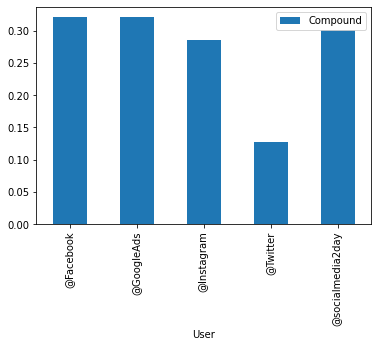

In [44]:
#plotting 
score_table.plot(kind='bar')

In [45]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
score_table

,Positive
User,
@Facebook,0.155410
@GoogleAds,0.130000
@Instagram,0.163770
@Twitter,0.095025
@socialmedia2day,0.174235


<AxesSubplot:xlabel='User'>

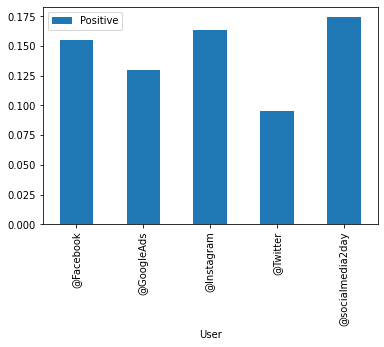

In [46]:
#Collect the negative values for each news source
pos_score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
pos_score_table
pos_score_table.plot(kind='bar')

In [47]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
score_table

,Negative
User,
@Facebook,0.026840
@GoogleAds,0.011170
@Instagram,0.052385
@Twitter,0.004685
@socialmedia2day,0.017760


<AxesSubplot:xlabel='User'>

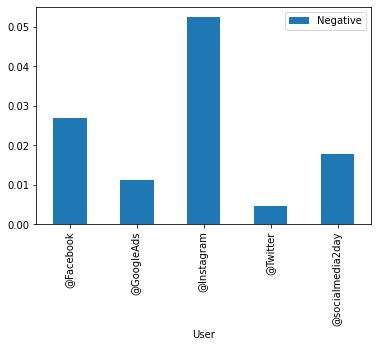

In [48]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table
neg_score_table.plot(kind='bar')

In [49]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
User,
@Facebook,0.026840
@GoogleAds,0.011170
@Instagram,0.052385
@Twitter,0.004685
@socialmedia2day,0.017760


In [50]:
from collections import Counter
import pandas as pd
a = dict(Counter(HT_positive))
t = list(a.items()) #added from line 52
#tuples = [(letter, idx) for idx, letter in enumerate(t)]
df = pd.DataFrame(t, columns=["Hashtags", "Number of Occurence"])
df.to_csv('hashtags.csv', index=False)
df4_saved_file = pd.read_csv('hashtags.csv')
df4_saved_file

,Hashtags,Number of Occurence
0,SMTLive,32
1,content,1
2,startup,1
3,SmallBusinessWeek,2
4,ecommerce,1
5,GML2021,2
6,GoogleIO,2
7,GoogleAdsTutorials,2
8,WomensHistoryMonth,2
9,GoogleForIndia,1
